# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [59]:
from ift6758.data import get_player_stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [63]:
df = get_player_stats(2018, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2018_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [64]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,SA,SV,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,27,STL,59,56,27,25,3,152,1614,1462,.906,2.75,1,7.9,3317,27,.482,8,107,-10.34,0,1,1,0
1,2,Frederik Andersen,28,TOR,66,66,38,21,5,182,2211,2029,.918,2.81,5,13.6,3889,37,.561,8,94,12.06,0,1,1,2
2,3,Craig Anderson,36,OTT,58,55,23,25,6,180,1768,1588,.898,3.32,2,7.2,3251,25,.455,11,116,-24.83,0,0,0,2
3,4,Ken Appleby,22,NJD,3,1,0,1,0,3,55,52,.945,1.45,0,0.5,124,0,.000,0,NaN,NaN,0,0,0,0
4,5,Jonathan Bernier,29,COL,37,34,19,13,3,95,1092,997,.913,2.85,2,6.2,2001,18,.529,5,99,0.84,0,1,1,0


In [65]:
print(df.shape[0])
df.dropna(subset=['SV%', 'GP'])
df["GP"] = pd.to_numeric(df["GP"])
print(df.describe())
df.sort_values(by=['SV%'], inplace=True, ascending=False)
pd.set_option('display.max_columns', None)
df.head()

95
              GP
count  95.000000
mean   29.052632
std    21.397638
min     1.000000
25%     9.500000
50%    27.000000
75%    48.000000
max    67.000000


,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,SA,SV,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
27,29,Scott Foster,36,CHI,1,0,0,0,0,0,7,7,1.000,0.00,0,0.1,14,0,NaN,0,NaN,NaN,0,0,0,0
88,95,Adam Wilcox,25,BUF,1,0,0,1,0,0,14,14,1.000,0.00,0,0.2,39,0,NaN,0,NaN,NaN,0,0,0,0
51,55,Marek Langhamer,23,ARI,1,0,0,0,0,0,10,10,1.000,0.00,0,0.2,29,0,NaN,0,NaN,NaN,0,0,0,0
16,17,Oscar Dansk,23,VEG,4,3,3,0,0,5,93,88,.946,1.78,1,0.9,169,3,1.000,0,NaN,NaN,0,0,0,0
3,4,Ken Appleby,22,NJD,3,1,0,1,0,3,55,52,.945,1.45,0,0.5,124,0,.000,0,NaN,NaN,0,0,0,0


In [71]:
df.dropna(subset=['SV%', 'GP'])
df["GP"] = pd.to_numeric(df["GP"])
df.drop(df[df.GP < 20].index, inplace=True)

df.sort_values(by=['SV%'], inplace=True, ascending=False)
pd.set_option('display.max_columns', None)
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,SA,SV,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
43,45,Carter Hutton,32,STL,32,26,17,7,3,56,810,754,.931,2.09,3,6.2,1610,19,.731,2,79,15.09,0,0,0,2
70,77,Antti Raanta,28,ARI,47,46,21,17,6,97,1388,1291,.930,2.24,3,10.4,2599,32,.696,6,80,24.82,0,0,0,0
56,60,Roberto Luongo,38,FLA,35,33,18,11,2,81,1143,1062,.929,2.47,3,8.5,1966,22,.667,3,81,19.32,0,2,2,0
25,27,Marc-Andre Fleury,33,VEG,46,46,29,13,4,100,1376,1276,.927,2.24,4,9.9,2673,31,.674,4,83,20.77,0,1,1,6
73,80,Pekka Rinne,35,NSH,59,59,42,13,4,134,1840,1706,.927,2.31,8,13.2,3475,40,.678,5,83,27.49,0,1,1,6


In [72]:
df.shape[0]

42

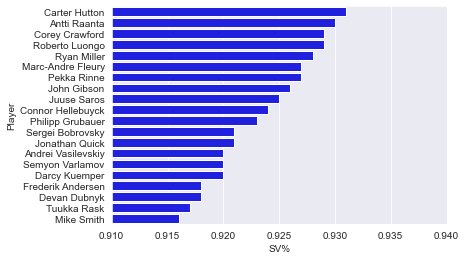

In [58]:
sns.set_style('darkgrid')
sns.color_palette("pastel")
df['SV%'] = df['SV%'].astype(float)
df = df.nlargest(20, 'SV%')
barplt = sns.barplot(x = "SV%", y = "Player", data = df,  color='b')
barplt.set(xlim=(0.91, 0.94))
plt.show()